In [4]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf
def get_closing_prices(symbol, start_date, end_date):
    # 下载数据
    data = yf.download(symbol, start=start_date, end=end_date)
    if data.empty:
        print(f'No data for symbol {symbol} between {start_date} and {end_date}')
        return None
    # 提取每日收盘价格
    closing_prices = data['Close']
    return closing_prices
# 用股票符号AAPL（代表苹果公司）获取数据
closing_prices = get_closing_prices('AAPL', '2023-01-01', '2023-07-01')
if closing_prices is not None:
    print(f'The closing prices are:')
    print(closing_prices)
else:
    print('Failed to get closing prices.')

[*********************100%***********************]  1 of 1 completed
The closing prices are:
Date
2023-01-03    125.070000
2023-01-04    126.360001
2023-01-05    125.019997
2023-01-06    129.619995
2023-01-09    130.149994
                 ...    
2023-06-26    185.270004
2023-06-27    188.059998
2023-06-28    189.250000
2023-06-29    189.589996
2023-06-30    193.970001
Name: Close, Length: 124, dtype: float64


In [6]:
import numpy as np
import pandas as pd
def calculate_metrics(closing_prices):
    # 计算普通收益率
    ordinary_returns = closing_prices.pct_change()
    # 计算对数收益率
    log_returns = np.log(closing_prices / closing_prices.shift(1))
    # 计算平均每日收益率
    mean_daily_returns = ordinary_returns.mean()
    # 计算平均每日波动率
    mean_daily_volatility = log_returns.std()
    # 计算年化收益率
    annualized_return = mean_daily_returns * 252
    # 计算年化波动率
    annualized_volatility = mean_daily_volatility * np.sqrt(252)
    return ordinary_returns, log_returns, mean_daily_returns, mean_daily_volatility, annualized_return, annualized_volatility
# 用股票符号AAPL（代表苹果公司）获取数据
closing_prices = get_closing_prices('AAPL', '2023-01-01', '2023-07-01')
if closing_prices is not None:
    ordinary_returns, log_returns, mean_daily_returns, mean_daily_volatility, annualized_return, annualized_volatility = calculate_metrics(closing_prices)
    print(f'Ordinary returns:\n{ordinary_returns}')
    print(f'Log returns:\n{log_returns}')
    print(f'Mean daily returns: {mean_daily_returns}')
    print(f'Mean daily volatility: {mean_daily_volatility}')
    print(f'Annualized return: {annualized_return}')
    print(f'Annualized volatility: {annualized_volatility}')
else:
    print('Failed to get closing prices.')

[*********************100%***********************]  1 of 1 completed
Ordinary returns:
Date
2023-01-03         NaN
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
                ...   
2023-06-26   -0.007553
2023-06-27    0.015059
2023-06-28    0.006328
2023-06-29    0.001797
2023-06-30    0.023103
Name: Close, Length: 124, dtype: float64
Log returns:
Date
2023-01-03         NaN
2023-01-04    0.010261
2023-01-05   -0.010661
2023-01-06    0.036133
2023-01-09    0.004081
                ...   
2023-06-26   -0.007582
2023-06-27    0.014947
2023-06-28    0.006308
2023-06-29    0.001795
2023-06-30    0.022840
Name: Close, Length: 124, dtype: float64
Mean daily returns: 0.0036581898983414052
Mean daily volatility: 0.012984112442675562
Annualized return: 0.9218638543820341
Annualized volatility: 0.2061163951093136


In [7]:
# 使用上述代码获取苹果公司的每日收盘价数据
closing_prices = get_closing_prices('AAPL', '2023-01-01', '2023-07-01')
# 将每日数据重新采样为每月数据，采用每月最后一天的收盘价作为该月的收盘价
monthly_closing_prices = closing_prices.resample('M').last()
# 打印每月收盘价
print(monthly_closing_prices)

[*********************100%***********************]  1 of 1 completed
Date
2023-01-31    144.289993
2023-02-28    147.410004
2023-03-31    164.899994
2023-04-30    169.679993
2023-05-31    177.250000
2023-06-30    193.970001
Freq: M, Name: Close, dtype: float64


In [8]:
# 使用上述代码获取苹果公司的每日收盘价数据
closing_prices = get_closing_prices('AAPL', '2023-01-01', '2023-07-01')
# 计算10日滚动平均价格
rolling_mean = closing_prices.rolling(window=10).mean()
print('10-Day Rolling Mean Prices:')
print(rolling_mean)
# 计算10日滚动标准差
rolling_std = closing_prices.rolling(window=10).std()
print('\n10-Day Rolling Standard Deviation:')
print(rolling_std)

[*********************100%***********************]  1 of 1 completed
10-Day Rolling Mean Prices:
Date
2023-01-03           NaN
2023-01-04           NaN
2023-01-05           NaN
2023-01-06           NaN
2023-01-09           NaN
                 ...    
2023-06-26    184.989998
2023-06-27    185.416998
2023-06-28    186.010999
2023-06-29    186.574998
2023-06-30    187.370999
Name: Close, Length: 124, dtype: float64

10-Day Rolling Standard Deviation:
Date
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06         NaN
2023-01-09         NaN
                ...   
2023-06-26    1.266017
2023-06-27    1.512422
2023-06-28    1.741993
2023-06-29    1.905880
2023-06-30    2.994849
Name: Close, Length: 124, dtype: float64


In [9]:
# 计算10日滚动中位数
rolling_median = closing_prices.rolling(window=10).median()
print('\n10-Day Rolling Median:')
print(rolling_median)
# 计算10日滚动最大值
rolling_max = closing_prices.rolling(window=10).max()
print('\n10-Day Rolling Maximum:')
print(rolling_max)
# 计算10日滚动最小值
rolling_min = closing_prices.rolling(window=10).min()
print('\n10-Day Rolling Minimum:')
print(rolling_min)


10-Day Rolling Median:
Date
2023-01-03           NaN
2023-01-04           NaN
2023-01-05           NaN
2023-01-06           NaN
2023-01-09           NaN
                 ...    
2023-06-26    184.964996
2023-06-27    185.139999
2023-06-28    185.639999
2023-06-29    186.344994
2023-06-30    186.839996
Name: Close, Length: 124, dtype: float64

10-Day Rolling Maximum:
Date
2023-01-03           NaN
2023-01-04           NaN
2023-01-05           NaN
2023-01-06           NaN
2023-01-09           NaN
                 ...    
2023-06-26    187.000000
2023-06-27    188.059998
2023-06-28    189.250000
2023-06-29    189.589996
2023-06-30    193.970001
Name: Close, Length: 124, dtype: float64

10-Day Rolling Minimum:
Date
2023-01-03           NaN
2023-01-04           NaN
2023-01-05           NaN
2023-01-06           NaN
2023-01-09           NaN
                 ...    
2023-06-26    183.309998
2023-06-27    183.309998
2023-06-28    183.949997
2023-06-29    183.960007
2023-06-30    183.960007
Name

<Axes: xlabel='Date'>

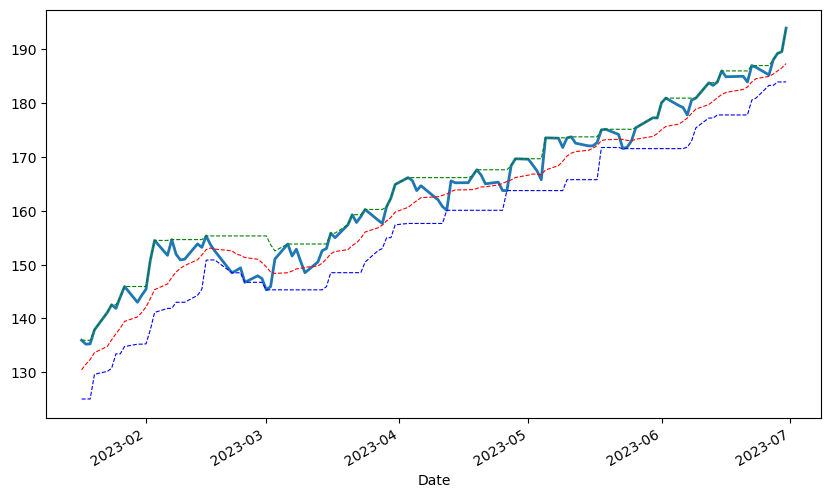

In [10]:
ax = closing_prices.iloc[9:].plot(figsize=(10, 6), lw=2.0)
rolling_min.iloc[9:].plot(ax=ax, style='b--', lw=0.8)
rolling_mean.iloc[9:].plot(ax=ax, style='r--', lw=0.8)
rolling_max.iloc[9:].plot(ax=ax, style='g--', lw=0.8)

<Axes: xlabel='Date'>

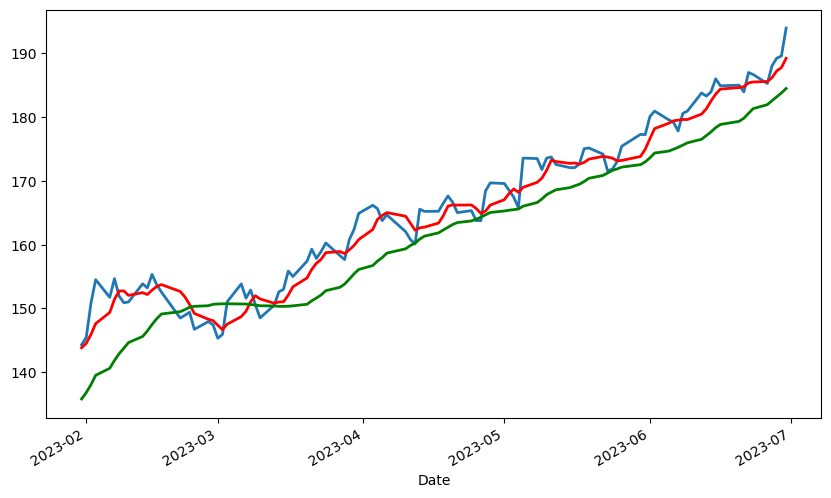

In [11]:
closing_price_short = closing_prices.rolling(window=5).mean()
closing_price_long = closing_prices.rolling(window=20).mean()
ax = closing_prices.iloc[19:].plot(figsize=(10, 6), lw=2.0)
closing_price_short[19:].plot(ax=ax,style='r',lw=2.0)
closing_price_long[19:].plot(ax=ax,style='g', lw=2.0)